<a href="https://colab.research.google.com/github/nazmulhasan015/114/blob/main/Class19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()


Saving Titanic.csv to Titanic.csv


In [20]:
import pandas as pd
df = pd.read_csv('Titanic.csv')
df.head()

print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())
print(df['Survived'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


In [21]:
print(pd.crosstab(df['Sex'], df['Survived']))
print(pd.crosstab(df['Pclass'], df['Survived']))
print(pd.crosstab(df['Embarked'], df['Survived']))

Survived    0    1
Sex               
female     81  233
male      468  109
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


In [23]:
print(df.groupby('Sex')['Fare'].mean())
print(df.groupby('Pclass')['Fare'].mean())
print(df.groupby('Embarked')['Fare'].mean())

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


In [26]:
df2=df.copy()
# Convert 'Survived' column to numeric type
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

# Calculate correlation only for numeric columns
print(df.corr(numeric_only=True))
print(df.corr())


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [28]:
df2=df.copy()
# Convert 'Survived' column to numeric type
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

# Calculate correlation only for numeric columns
print(df.corr(numeric_only=True))

#If you want to calculate correlation for specific columns or handle non-numeric columns differently, you will need to modify the code accordingly.
# For instance, you might want to drop non-numeric columns before calculating the correlation.
#print(df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [30]:
print(df['Embarked'].value_counts())
print(pd.crosstab(df['Pclass'], df['Survived']))
import pandas as pd

if 'Survived' not in df.columns or 'Age' not in df.columns:
    raise ValueError("The dataset must contain 'Survived' and 'Age' columns.")

average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print(f"Average age of survivors: {average_age_survived:.2f}")
print(f"Average age of non-survivors: {average_age_not_survived:.2f}")



Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Average age of survivors: 28.34
Average age of non-survivors: 30.63


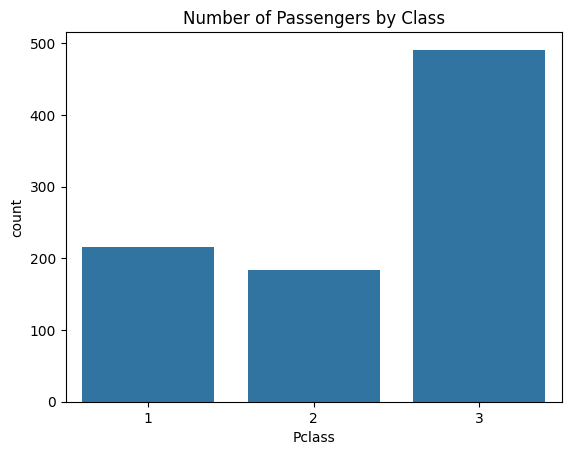

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='Pclass', data=df)
plt.title('Number of Passengers by Class')
plt.show()

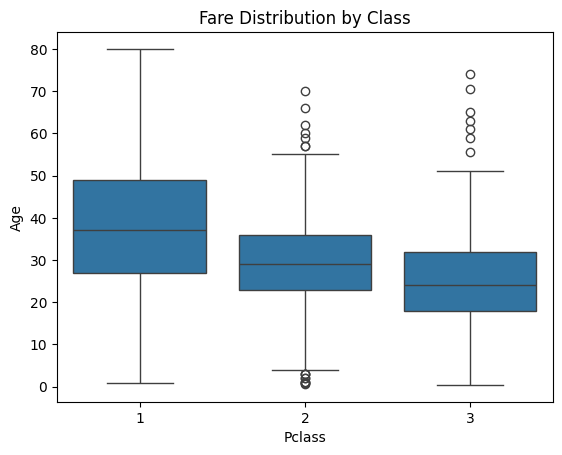

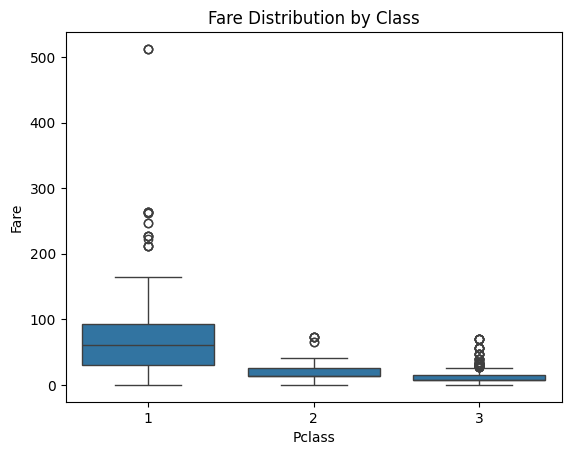

In [38]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Fare Distribution by Class')
plt.show()
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.show()


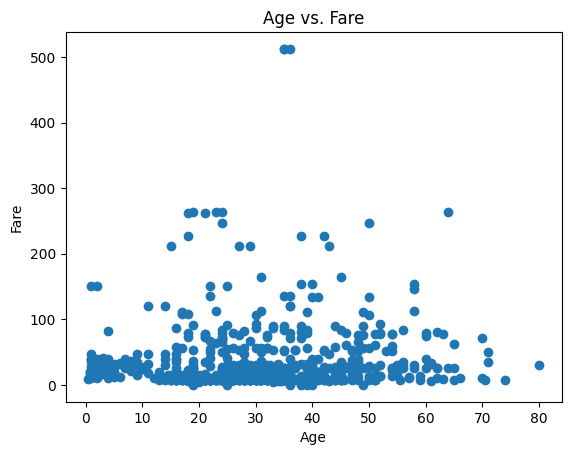

In [40]:
plt.scatter(x='Age', y='Fare', data=df)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [44]:
pivot=df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
print(pivot)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [55]:
data['FarePerPerson'] = data['Fare'] / data['FamilySize']+1
print("\nData with new feature:")
print(data[['Fareperperson']].head())
data['NormalizedAge']=data['Age']
apply(lambda x: (x - data['Age'].mean()) / data['Age'].std())
print("\nData with new feature:")
print(data[['FarePerPerson']].head())


NameError: name 'data' is not defined